In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import matplotlib.pyplot as plt
from collections import Counter

In [49]:
f = open("partial_data.csv", "r")

x = []
y = []

for line in f.readlines():
    sequence = line.split(",")

    sequence = [int(x) for x in sequence]

    for i in range(len(sequence)-10):
        x.append(sequence[i:i+10])
        y.append(sequence[i+10])

f.close()

x = np.array(x)

y = np.array(y)

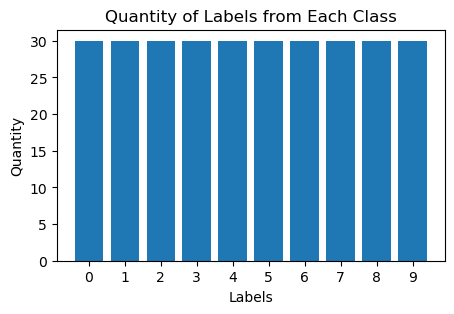

In [50]:
def draw_bar_chart(labels):
    fig, ax = plt.subplots(figsize=(5, 3))
    # Count the frequency of each label
    label_counts = Counter(labels)

    # Get the labels and their respective counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Set up the bar chart
    plt.bar(labels, counts)
    ax.set_xticks(labels)
    plt.xlabel('Labels')
    plt.ylabel('Quantity')
    plt.title('Quantity of Labels from Each Class')

    # Display the chart
    plt.show()

draw_bar_chart(y)

[0 1 2 3 4 5 6 7 8 9]
10


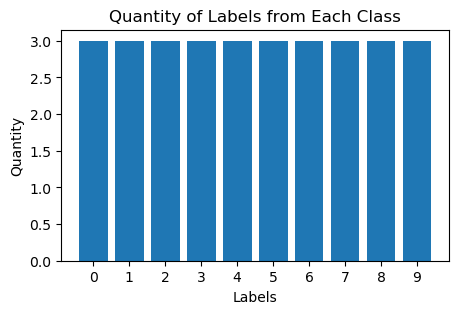

In [51]:
num = len(y)

idx = np.random.permutation(num)

x = x[idx]
y = y[idx]

#x = x.reshape((x.shape[0], x.shape[1], 1))

n_classes = len(np.unique(y))

print(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle2(x, y)

draw_bar_chart(y_val)

In [52]:
def LSTM_Model(features=256, dropout=0.1, units=1024):
    model=keras.models.Sequential()
    # Embedding layer
    model.add(layers.Embedding(10,features,input_length=10))
    # Long Short Term Memory layer
    model.add(layers.LSTM(units, dropout=dropout))
    # Output layer
    model.add(layers.Dense(n_classes,activation='sigmoid'))
    return model

In [53]:
input_shape = x.shape[1:]

model = LSTM_Model()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["sparse_categorical_accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    #validation_split=0.2,
    epochs=1000,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 256)           2560      
                                                                 
 lstm_4 (LSTM)               (None, 1024)              5246976   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 5,259,786
Trainable params: 5,259,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2023-05-16 18:05:16.244418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 18:05:16.246230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 18:05:16.247528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - ETA: 0s - loss: 2.2998 - sparse_categorical_accuracy: 0.1875

2023-05-16 18:05:19.029300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 18:05:19.031094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 18:05:19.033340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - 3s 69ms/step - loss: 2.2998 - sparse_categorical_accuracy: 0.1875 - val_loss: 2.2963 - val_sparse_categorical_accuracy: 0.2333
Epoch 2/1000
15/15 [==============================] - 1s 35ms/step - loss: 2.2932 - sparse_categorical_accuracy: 0.4250 - val_loss: 2.2903 - val_sparse_categorical_accuracy: 0.5333
Epoch 3/1000
15/15 [==============================] - 1s 34ms/step - loss: 2.2869 - sparse_categorical_accuracy: 0.6167 - val_loss: 2.2845 - val_sparse_categorical_accuracy: 0.6667
Epoch 4/1000
15/15 [==============================] - 1s 35ms/step - loss: 2.2804 - sparse_categorical_accuracy: 0.6875 - val_loss: 2.2788 - val_sparse_categorical_accuracy: 0.6667
Epoch 5/1000
15/15 [==============================] - 1s 34ms/step - loss: 2.2737 - sparse_categorical_accuracy: 0.6875 - val_loss: 2.2727 - val_sparse_categorical_accuracy: 0.6667
Epoch 6/1000
15/15 [==============================] - 1s 34ms/step - loss: 2.2672 - sparse_categorical_accur

[1.1810524463653564, 0.8333333134651184]

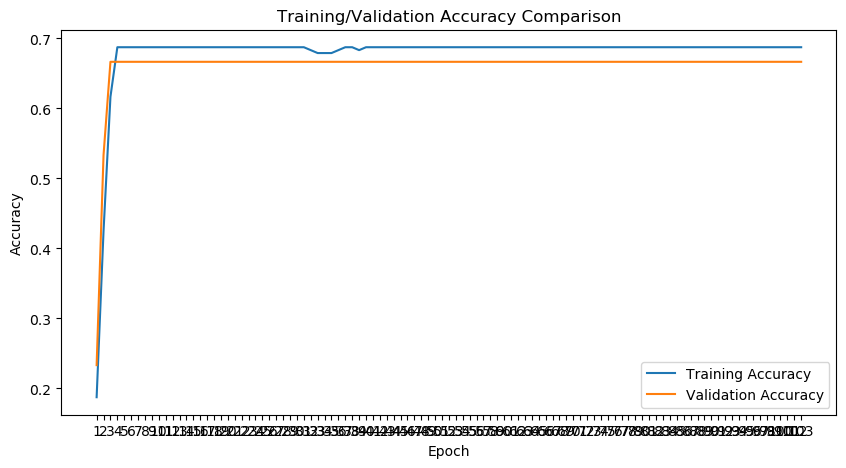

In [54]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

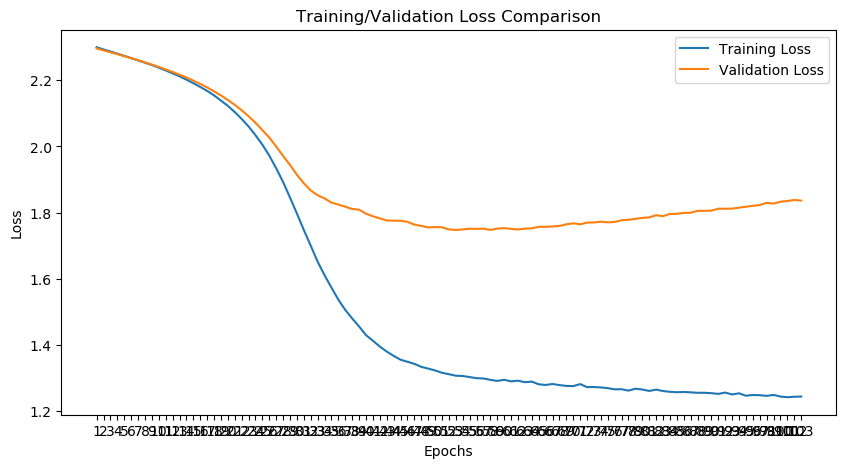

In [55]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

1/1 [==============================] - 0s 389ms/step


2023-05-16 18:06:13.308621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 18:06:13.310232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 18:06:13.311489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

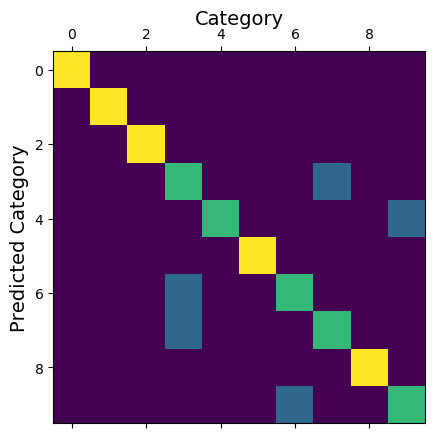

In [56]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred)

In [57]:
#a = np.array([0,1,0,0,1,0,0,1,0,0])
#a = np.array([1,1,0,1,1,0,1,1,0,1])
#a = np.array([2,2,0,2,2,1,2,2,3,2])
a = np.array([7,7,0,7,7,3,7,7,6,7])

a = a.reshape((a.shape[0],1))

print(a.shape)

model.predict(a)

(10, 1)
1/1 [==============================] - 0s 379ms/step


2023-05-16 18:06:13.911883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 18:06:13.914011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 18:06:13.916403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

array([[0.49774015, 0.4921039 , 0.49499705, 0.49655575, 0.49963453,
        0.49857867, 0.5003663 , 0.5238925 , 0.49585518, 0.4950161 ],
       [0.49774015, 0.4921039 , 0.49499705, 0.49655575, 0.49963453,
        0.49857867, 0.5003663 , 0.5238925 , 0.49585518, 0.4950161 ],
       [0.5225997 , 0.49974388, 0.49787772, 0.5017844 , 0.4951617 ,
        0.49542657, 0.49701   , 0.4900843 , 0.4980404 , 0.4967267 ],
       [0.49774015, 0.4921039 , 0.49499705, 0.49655575, 0.49963453,
        0.49857867, 0.5003663 , 0.5238925 , 0.49585518, 0.4950161 ],
       [0.49774015, 0.4921039 , 0.49499705, 0.49655575, 0.49963453,
        0.49857867, 0.5003663 , 0.5238925 , 0.49585518, 0.4950161 ],
       [0.4984366 , 0.49309957, 0.49657536, 0.52427584, 0.4962736 ,
        0.49807826, 0.4990111 , 0.48858047, 0.49855295, 0.50229603],
       [0.49774015, 0.4921039 , 0.49499705, 0.49655575, 0.49963453,
        0.49857867, 0.5003663 , 0.5238925 , 0.49585518, 0.4950161 ],
       [0.49774015, 0.4921039 , 0.4949970

In [58]:
model.save('../models/lstm_numbers')

2023-05-16 18:06:14.351692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 18:06:14.353467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 18:06:14.354781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: ../models/lstm_numbers/assets


INFO:tensorflow:Assets written to: ../models/lstm_numbers/assets


In [59]:
model = tf.keras.models.load_model('../models/lstm_numbers')

2023-05-16 18:06:20.853912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-16 18:06:20.854053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-05-16 18:06:20.854155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus